In [15]:
%load_ext autoreload
%autoreload
%matplotlib inline
from pathlib import Path
#from train import *
from learner import *
from unet_dataset import *
from torch.utils.tensorboard import SummaryWriter
import torch
import torchvision

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of learner failed: Traceback (most recent call last):
  File "/software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    frame = next(frame_nfo.frame for frame_nfo in inspect.stack()
StopIteration
]

In [2]:
model_id = 'unet_v1_test'
train_id = 1
log_id = model_id + str(train_id)

In [3]:
train_dataset=UNetDataset(root_dir=Path('advanced_dataset'), part='train')
valid_dataset=UNetDataset(root_dir=Path('advanced_dataset'), part='valid')

In [27]:
model = UNet(size=train_dataset.item_size, in_channels=train_dataset.image_channels, classes=train_dataset.classes, depth=5)

In [28]:
writer = SummaryWriter('runs/' + log_id)

In [29]:
def handle_end_epoch(epoch_loss, epoch):
    writer.add_scalar('loss', epoch_loss, epoch)

In [30]:
callback = LearnerCallback(end_epoch=handle_end_epoch)

learner = UNetLearner(model, train_dataset=train_dataset, valid_dataset=valid_dataset, cuda=True, callback=callback)

In [33]:
learner.train(n_epochs=3, batch_size=5)

Epoch 3 train loss: 0.318047896027565 valid loss: 0.31272634863853455
Epoch 4 train loss: 0.3179546669125557 valid loss: 0.3125481605529785
Epoch 5 train loss: 0.3177991807460785 valid loss: 0.31231413781642914


In [15]:
learner.train_history[0].hyperparameters

{'state': {},
 'param_groups': [{'lr': 0.0003,
   'momentum': 0.9,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'params': [35188056874224,
    35188056874368,
    35188053456648,
    35188162448408,
    35184563862624,
    35188162448480,
    35188162448552,
    35188162448624,
    35188162448984,
    35188162449056,
    35188162449200,
    35188162449344,
    35188226441576,
    35188226441648,
    35188226441864,
    35188226442008,
    35188226442152,
    35188226442224,
    35188226442368,
    35188226442512,
    35188226442728,
    35188226442800,
    35188226443088,
    35188226443160,
    35188226443304,
    35188226443448,
    35188226443376,
    35188226443664,
    35188226443952,
    35188226444024,
    35188226444168,
    35188226444312,
    35188226444240,
    35188226444528,
    35188226444816,
    35188226444888,
    35188226445032,
    35188226445176,
    35188226543688,
    35188226543760,
    35188226544048,
    35188226544120,
    35188226544264,


In [24]:
learner.save_checkpoint(path=Path('saves/test2'), model_id='test')

In [32]:
learner.load_checkpoint(path=Path('saves/test2'))

In [13]:
learner.train_history

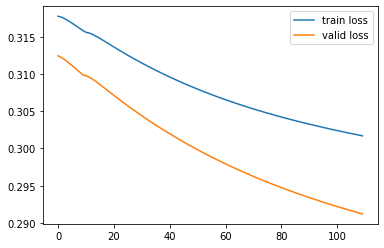

In [58]:
learner.plot_metrics()

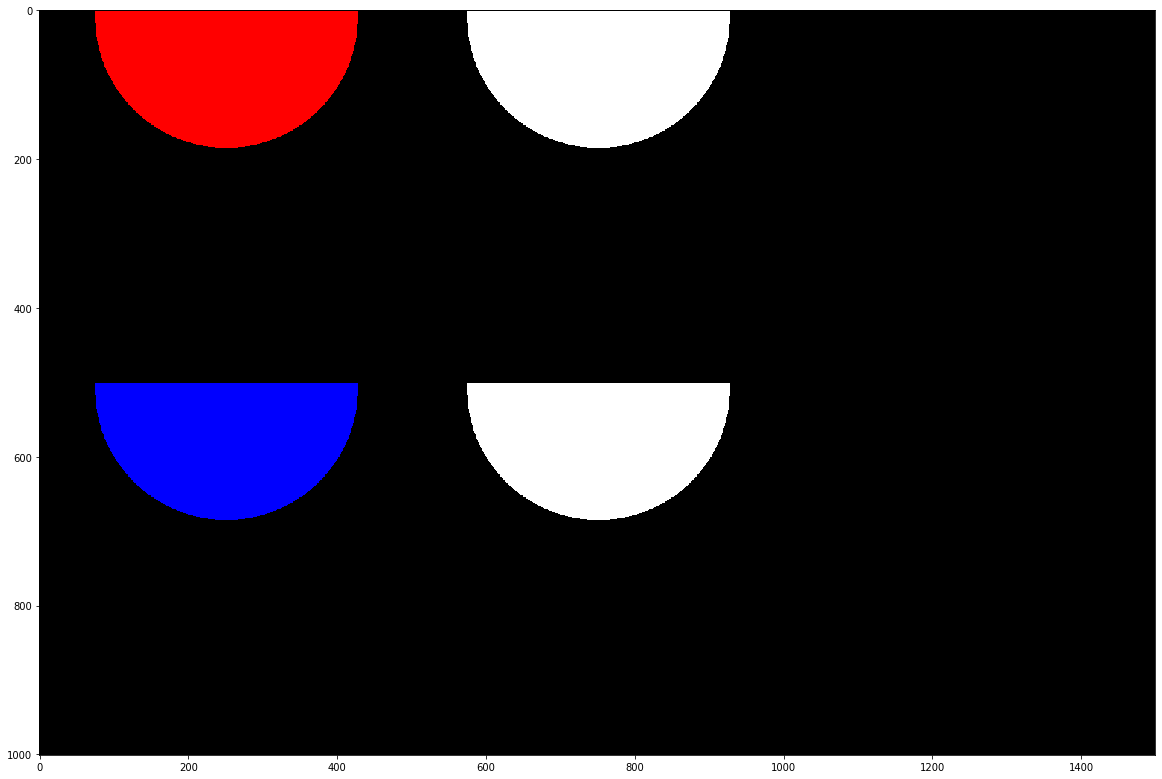

In [59]:
learner.show_results(train_dataset, 2, figsize=(20, 20))

In [48]:
import random
random.randint(0, 2)

2

In [32]:
Path('saves/test').exists()

False